In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("00_files/01-study_hours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


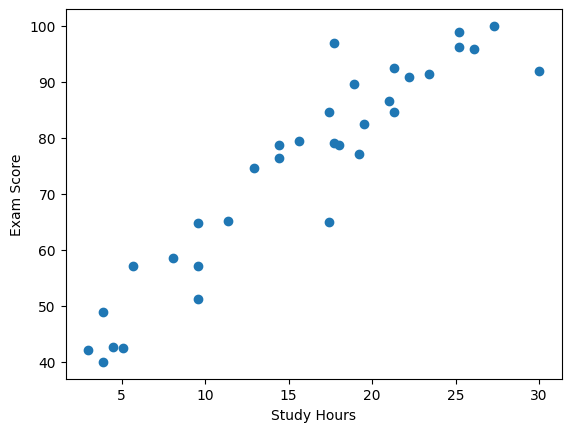

In [5]:
plt.scatter(df["Study Hours"], df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")

plt.show()

In [6]:
# independant (X) and dependent (y) features : X -> MAJ | y -> min
X=df[["Study Hours"]]
y=df["Exam Score"]

In [7]:
# train - test - split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 15)

In [10]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [11]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [12]:
# standardize the data set

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# balanced features values
# efficient gradient descent
# l1, l2

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train) # fit -> data leakage 
X_test = scaler.transform(X_test) 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression()

In [19]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [20]:
print("Coefficient : ", regression.coef_)
print("Intercept : ", regression.intercept_)

Coefficient :  [16.17860223]
Intercept :  76.9076923076923


In [21]:
# y = 76.91 + 16.18 x

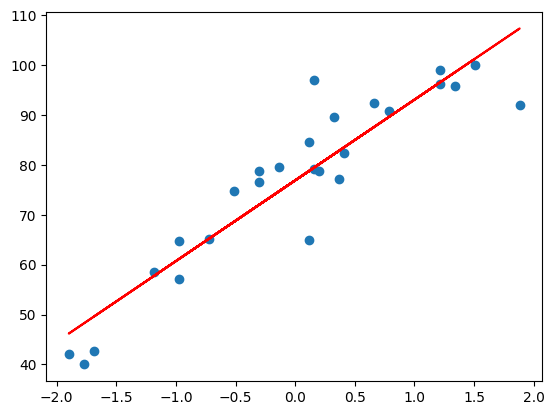

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), "r")
plt.show()

In [23]:
# X = 20, y = ?

In [24]:
regression.predict(scaler.transform(pd.DataFrame([[20]], columns=["Study Hours"]))) # The exam score of someone who works 20 hours 

array([84.70590731])

In [25]:
regression.predict(scaler.transform(pd.DataFrame([[44]], columns=["Study Hours"]))) # The exam score of someone who works 44 hours 

array([139.07558505])

In [26]:
regression.predict(scaler.transform(pd.DataFrame([[5]], columns=["Study Hours"]))) # The exam score of someone who works 5 hours 

array([50.72485871])

In [27]:
# prediction with test data

In [28]:
y_pred_test = regression.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
mse = mean_squared_error(y_test, y_pred_test) # average of squared errors (penalizes big mistakes more)
mae = mean_absolute_error(y_test, y_pred_test) # average of absolute differences between real and predicted values
rmse = np.sqrt(mse) # square root of MSE (error in same unit as target)

print("mse : ", mse)
print("mae : ", mae)
print("rmse : ", rmse)

mse :  29.45839048833392
mae :  4.054868128856142
rmse :  5.427558427906043


In [31]:
r2 = r2_score(y_test, y_pred_test) # measures how well the model explains the variance (goodness of fit)
print("r2 score : ", r2)

r2 score :  0.9196596206825491


In [32]:
1 - (1-r2) * (len(y_test) -1) / (len(y_test) - X_test.shape[1] -1) # adjusted r2 score

0.903591544819059